In [1]:
import os
import gym
from matplotlib import pyplot as plt
import numpy as np
from ddpg_torch.ddpg_agent import Agent

from envs.escape_room_continuous_space_env import EscapeRoomEnv

# from envs.new_escape_room_env import EscapeRoomEnv
from tqdm import trange

In [3]:
def train_diff_robot_custom_env(alpha=0.0001, beta=0.001, tau=0.001, n_games=500):
    env = EscapeRoomEnv()
    agent = Agent(
        alpha=alpha,
        beta=beta,
        input_dims=env.observation_space.shape,
        tau=tau,
        batch_size=64,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
    )

    filename = f"EscapeRoom_alpha_{agent.alpha}_beta_{agent.beta}_{n_games}_games"
    figure_file = f"plots/{filename}.png"
    score_history = []
    critic_losses = []
    actor_losses = []

    save_interval = n_games // 10  # Save model and plot every 10% of n_games
    pbar = trange(n_games)

    for i in pbar:
        state, info = env.reset()
        done = False
        score = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, reward, next_state, done)
            learn_outputs = agent.learn()
            if learn_outputs:
                critic_loss, actor_loss = learn_outputs
            else:
                critic_loss, actor_loss = (
                    0,
                    0,
                )  # Default values when learning doesn't happen

            score += reward
            state = next_state

        score_history.append(score)
        critic_losses.append(critic_loss)
        actor_losses.append(actor_loss)

        avg_score = np.mean(
            score_history
        )  # Calculate average score after appending current score

        if (
            i % save_interval == 0 or i == n_games - 1
        ):  # Save model and plot at intervals
            agent.save_models()

        pbar.set_description(
            f"Episode {i}: Score {score:.1f}, Info : {info['reason']}, Average Score {avg_score:.3f}, Actor Losses {actor_losses[-1]:.3f}, Critic Losses {critic_losses[-1]:.3f}"
        )

    return score_history, critic_losses, actor_losses, figure_file

In [4]:
score_history, critic_losses, actor_losses, figure_file = train_diff_robot_custom_env()

/home/deep/.local/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
  0%|          | 0/500 [00:00<?, ?it/s]/home/deep/data/NEU/RL/Project/new_dqn_project/final_update/ddpg_torch/ddpg_agent.py:223: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state = T.tensor([observation], dtype=T.float).to(self.actor.device)
Episode 135: Score 2349.3, Info : all_goals_reached, Average Score -361.911, Actor Losses -15.013, Critic Losses 4.880:  27%|██▋       | 136/500 [01:40<11:06,  1.83s/it]  

Goal 'G' reached in 106 steps with cumulative reward 1002.8738574343292 for this episode.


Episode 139: Score 2305.3, Info : all_goals_reached, Average Score -373.744, Actor Losses -20.116, Critic Losses 5.688:  28%|██▊       | 140/500 [01:45<07:11,  1.20s/it] 

Goal 'G' reached in 69 steps with cumulative reward 1002.9513499567988 for this episode.


Episode 140: Score 2293.0, Info : all_goals_reached, Average Score -354.830, Actor Losses -10.049, Critic Losses 3.707:  28%|██▊       | 141/500 [01:45<05:28,  1.09it/s]

Goal 'G' reached in 76 steps with cumulative reward 1001.3039293016524 for this episode.


Episode 149: Score 2202.0, Info : all_goals_reached, Average Score -340.022, Actor Losses -17.103, Critic Losses 9.013:  30%|███       | 150/500 [01:51<04:56,  1.18it/s] 

Goal 'G' reached in 107 steps with cumulative reward 1001.3793443948251 for this episode.


Episode 150: Score 2183.3, Info : all_goals_reached, Average Score -323.311, Actor Losses -24.078, Critic Losses 16.204:  30%|███       | 151/500 [01:51<04:10,  1.39it/s]

Goal 'G' reached in 118 steps with cumulative reward 1001.1399254333725 for this episode.


Episode 179: Score 2254.2, Info : all_goals_reached, Average Score -523.217, Actor Losses -73.331, Critic Losses 320.571:  36%|███▌      | 180/500 [02:33<06:30,  1.22s/it] 

Goal 'G' reached in 82 steps with cumulative reward 1003.1643694333144 for this episode.


Episode 190: Score 1905.4, Info : all_goals_reached, Average Score -523.783, Actor Losses -69.889, Critic Losses 231.908:  38%|███▊      | 191/500 [02:44<05:51,  1.14s/it]

Goal 'G' reached in 160 steps with cumulative reward 1002.7151718631654 for this episode.


Episode 191: Score 2335.8, Info : all_goals_reached, Average Score -508.890, Actor Losses -69.139, Critic Losses 45.594:  38%|███▊      | 192/500 [02:45<04:45,  1.08it/s] 

Goal 'G' reached in 135 steps with cumulative reward 1003.8163449440539 for this episode.


Episode 194: Score 2254.4, Info : all_goals_reached, Average Score -493.315, Actor Losses -65.190, Critic Losses 1303.717:  39%|███▉      | 195/500 [02:47<03:40,  1.38it/s]

Goal 'G' reached in 53 steps with cumulative reward 1002.4605558635566 for this episode.
Goal 'G' reached in 57 steps with cumulative reward 1002.6480380263556 for this episode.


Episode 196: Score 2240.9, Info : all_goals_reached, Average Score -465.021, Actor Losses -71.524, Critic Losses 25.725:  39%|███▉      | 197/500 [02:48<02:26,  2.07it/s]  

Goal 'G' reached in 113 steps with cumulative reward 1002.8718250918172 for this episode.
Goal 'G' reached in 51 steps with cumulative reward 1002.6097737557336 for this episode.


Episode 197: Score 2238.0, Info : all_goals_reached, Average Score -451.369, Actor Losses -61.723, Critic Losses 140.335:  40%|███▉      | 198/500 [02:48<01:57,  2.57it/s]

Goal 'G' reached in 50 steps with cumulative reward 1002.848612703401 for this episode.


Episode 199: Score 2305.5, Info : all_goals_reached, Average Score -434.539, Actor Losses -69.201, Critic Losses 80.286:  40%|████      | 200/500 [02:49<01:45,  2.85it/s] 

Goal 'G' reached in 101 steps with cumulative reward 1003.2276906215444 for this episode.


Episode 200: Score 2105.2, Info : all_goals_reached, Average Score -421.903, Actor Losses -50.448, Critic Losses 105.582:  40%|████      | 201/500 [02:49<01:57,  2.55it/s]

Goal 'G' reached in 145 steps with cumulative reward 1000.8276761534275 for this episode.


Episode 204: Score 2361.6, Info : all_goals_reached, Average Score -403.886, Actor Losses -73.558, Critic Losses 32.735:  41%|████      | 205/500 [02:51<02:21,  2.08it/s] 

Goal 'G' reached in 108 steps with cumulative reward 1003.0235370165447 for this episode.


Episode 205: Score 2300.2, Info : all_goals_reached, Average Score -390.759, Actor Losses -75.847, Critic Losses 56.425:  41%|████      | 206/500 [02:52<02:01,  2.42it/s]

Goal 'G' reached in 77 steps with cumulative reward 1002.531150901584 for this episode.


Episode 207: Score 2242.4, Info : all_goals_reached, Average Score -365.272, Actor Losses -76.688, Critic Losses 44.492:  42%|████▏     | 208/500 [02:52<01:30,  3.22it/s]

Goal 'G' reached in 76 steps with cumulative reward 1002.9323777982613 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1000.7988393844297 for this episode.


Episode 208: Score 2284.7, Info : all_goals_reached, Average Score -352.593, Actor Losses -78.626, Critic Losses 206.726:  42%|████▏     | 209/500 [02:52<01:25,  3.42it/s]

Goal 'G' reached in 76 steps with cumulative reward 1002.9619659231699 for this episode.


Episode 209: Score 2301.5, Info : all_goals_reached, Average Score -339.954, Actor Losses -92.581, Critic Losses 52.529:  42%|████▏     | 210/500 [02:53<01:31,  3.18it/s] 

Goal 'G' reached in 109 steps with cumulative reward 1003.084892103115 for this episode.


Episode 212: Score 2315.5, Info : all_goals_reached, Average Score -323.006, Actor Losses -72.771, Critic Losses 65.686:  43%|████▎     | 213/500 [02:53<01:19,  3.62it/s]

Goal 'G' reached in 86 steps with cumulative reward 1002.4372606277094 for this episode.


Episode 213: Score 2264.9, Info : all_goals_reached, Average Score -310.913, Actor Losses -79.566, Critic Losses 146.416:  43%|████▎     | 214/500 [02:54<01:17,  3.67it/s]

Goal 'G' reached in 78 steps with cumulative reward 1003.0237594925388 for this episode.


Episode 215: Score 2304.5, Info : all_goals_reached, Average Score -296.509, Actor Losses -80.089, Critic Losses 457.021:  43%|████▎     | 216/500 [02:54<01:23,  3.39it/s]

Goal 'G' reached in 89 steps with cumulative reward 1003.1909353448021 for this episode.


Episode 220: Score 2279.0, Info : all_goals_reached, Average Score -288.884, Actor Losses -84.423, Critic Losses 138.565:  44%|████▍     | 221/500 [02:57<01:58,  2.35it/s]

Goal 'G' reached in 99 steps with cumulative reward 1000.5582507642243 for this episode.


Episode 223: Score 2287.2, Info : all_goals_reached, Average Score -273.481, Actor Losses -72.426, Critic Losses 94.660:  45%|████▍     | 224/500 [02:58<01:29,  3.09it/s] 

Goal 'G' reached in 86 steps with cumulative reward 1003.4631757521453 for this episode.


Episode 226: Score 2297.5, Info : all_goals_reached, Average Score -258.299, Actor Losses -92.558, Critic Losses 127.761:  45%|████▌     | 227/500 [02:59<01:21,  3.35it/s]

Goal 'G' reached in 83 steps with cumulative reward 1002.8623146930836 for this episode.


Episode 229: Score 2336.3, Info : all_goals_reached, Average Score -243.182, Actor Losses -73.943, Critic Losses 1823.086:  46%|████▌     | 230/500 [03:00<01:27,  3.07it/s]

Goal 'G' reached in 108 steps with cumulative reward 1003.4501627106962 for this episode.


Episode 240: Score 2269.8, Info : all_goals_reached, Average Score -215.308, Actor Losses -84.787, Critic Losses 2679.983:  48%|████▊     | 241/500 [03:03<01:10,  3.69it/s]

Goal 'G' reached in 77 steps with cumulative reward 1003.5264092425015 for this episode.


Episode 245: Score 2241.0, Info : all_goals_reached, Average Score -222.331, Actor Losses -83.570, Critic Losses 200.950:  49%|████▉     | 246/500 [03:08<02:59,  1.42it/s] 

Goal 'G' reached in 52 steps with cumulative reward 1002.9861068650087 for this episode.


Episode 246: Score 2243.8, Info : all_goals_reached, Average Score -212.347, Actor Losses -80.551, Critic Losses 40.017:  49%|████▉     | 247/500 [03:08<02:21,  1.79it/s] 

Goal 'G' reached in 59 steps with cumulative reward 1000.4513532606495 for this episode.


Episode 248: Score 2268.5, Info : all_goals_reached, Average Score -201.100, Actor Losses -77.232, Critic Losses 198.878:  50%|████▉     | 249/500 [03:08<01:37,  2.57it/s]

Goal 'G' reached in 68 steps with cumulative reward 1003.5740606198352 for this episode.


Episode 254: Score 158.6, Info : out_of_bounds, Average Score -207.450, Actor Losses -88.762, Critic Losses 489.698:  51%|█████     | 255/500 [03:14<02:29,  1.64it/s]       

Goal 'G' reached in 56 steps with cumulative reward 1003.8909481487913 for this episode.


Episode 261: Score 2257.9, Info : all_goals_reached, Average Score -191.257, Actor Losses -96.506, Critic Losses 64.449:  52%|█████▏    | 262/500 [03:17<01:40,  2.37it/s]

Goal 'G' reached in 65 steps with cumulative reward 1000.8337969871029 for this episode.


Episode 263: Score 2261.5, Info : all_goals_reached, Average Score -197.481, Actor Losses -90.723, Critic Losses 392.157:  53%|█████▎    | 264/500 [03:20<03:34,  1.10it/s]

Goal 'G' reached in 63 steps with cumulative reward 1001.9706869945691 for this episode.


Episode 272: Score 1016.4, Info : all_goals_reached, Average Score -194.012, Actor Losses -90.917, Critic Losses 146.788:  55%|█████▍    | 273/500 [03:27<04:10,  1.10s/it]

Goal 'G' reached in 519 steps with cumulative reward 1002.6796437881924 for this episode.


Episode 273: Score 2260.3, Info : all_goals_reached, Average Score -185.054, Actor Losses -93.633, Critic Losses 105.765:  55%|█████▍    | 274/500 [03:27<03:08,  1.20it/s]

Goal 'G' reached in 67 steps with cumulative reward 1003.0288317184297 for this episode.


Episode 275: Score 2241.2, Info : all_goals_reached, Average Score -175.189, Actor Losses -86.611, Critic Losses 113.974:  55%|█████▌    | 276/500 [03:28<01:53,  1.98it/s]

Goal 'G' reached in 57 steps with cumulative reward 1002.9991150423931 for this episode.


Episode 279: Score 1478.2, Info : all_goals_reached, Average Score -168.940, Actor Losses -80.499, Critic Losses 267.567:  56%|█████▌    | 280/500 [03:29<01:41,  2.17it/s]

Goal 'G' reached in 256 steps with cumulative reward 1001.1617539948378 for this episode.


Episode 283: Score 2271.0, Info : all_goals_reached, Average Score -157.673, Actor Losses -76.407, Critic Losses 515.749:  57%|█████▋    | 284/500 [03:31<01:12,  2.96it/s]

Goal 'G' reached in 80 steps with cumulative reward 1001.6678857596311 for this episode.


Episode 288: Score 2283.1, Info : all_goals_reached, Average Score -158.962, Actor Losses -117.281, Critic Losses 2302.305:  58%|█████▊    | 289/500 [03:35<02:05,  1.68it/s]

Goal 'G' reached in 81 steps with cumulative reward 1002.986920344105 for this episode.


Episode 301: Score -951.8, Info : all_goals_reached, Average Score -162.523, Actor Losses -101.339, Critic Losses 685.362:  60%|██████    | 302/500 [03:40<01:39,  1.99it/s] 

Goal 'G' reached in 918 steps with cumulative reward 1001.0115367266416 for this episode.


Episode 303: Score 1046.9, Info : all_goals_reached, Average Score -157.695, Actor Losses -78.218, Critic Losses 948.370:  61%|██████    | 304/500 [03:42<01:49,  1.79it/s] 

Goal 'G' reached in 320 steps with cumulative reward 1002.0230411973279 for this episode.


Episode 307: Score 2181.7, Info : all_goals_reached, Average Score -156.312, Actor Losses -114.605, Critic Losses 51912.309:  62%|██████▏   | 308/500 [03:46<02:27,  1.30it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.0930398374956 for this episode.


Episode 311: Score 2211.3, Info : all_goals_reached, Average Score -149.056, Actor Losses -111.282, Critic Losses 614.497:  62%|██████▏   | 312/500 [03:51<02:21,  1.33it/s]  

Goal 'G' reached in 56 steps with cumulative reward 1001.1433965701325 for this episode.


Episode 314: Score 2248.7, Info : all_goals_reached, Average Score -150.943, Actor Losses -108.169, Critic Losses 576.783:  63%|██████▎   | 315/500 [03:56<04:20,  1.41s/it] 

Goal 'G' reached in 459 steps with cumulative reward 1003.68690638751 for this episode.


Episode 320: Score 2237.6, Info : all_goals_reached, Average Score -160.148, Actor Losses -103.385, Critic Losses 1311.912:  64%|██████▍   | 321/500 [04:03<02:35,  1.15it/s]

Goal 'G' reached in 90 steps with cumulative reward 1002.1599417280238 for this episode.


Episode 321: Score 2296.1, Info : all_goals_reached, Average Score -152.520, Actor Losses -163.410, Critic Losses 227.401:  64%|██████▍   | 322/500 [04:03<01:59,  1.50it/s] 

Goal 'G' reached in 67 steps with cumulative reward 1002.8023254329612 for this episode.


Episode 322: Score 2288.4, Info : all_goals_reached, Average Score -144.963, Actor Losses -119.179, Critic Losses 276.432:  65%|██████▍   | 323/500 [04:03<01:34,  1.88it/s]

Goal 'G' reached in 69 steps with cumulative reward 1003.4194017395225 for this episode.


Episode 324: Score 2220.7, Info : all_goals_reached, Average Score -137.016, Actor Losses -132.698, Critic Losses 618.678:  65%|██████▌   | 325/500 [04:04<01:06,  2.63it/s]

Goal 'G' reached in 74 steps with cumulative reward 1001.1230701484252 for this episode.


Episode 327: Score 2291.2, Info : all_goals_reached, Average Score -121.810, Actor Losses -103.298, Critic Losses 1295.439:  66%|██████▌   | 328/500 [04:04<00:43,  3.91it/s]

Goal 'G' reached in 56 steps with cumulative reward 1001.2546870125974 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1003.7899183190879 for this episode.


Episode 330: Score 2262.4, Info : all_goals_reached, Average Score -106.935, Actor Losses -124.421, Critic Losses 325.893:  66%|██████▌   | 331/500 [04:05<00:34,  4.95it/s] 

Goal 'G' reached in 56 steps with cumulative reward 1001.2348645034548 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1003.69988864645 for this episode.


Episode 331: Score 2198.3, Info : all_goals_reached, Average Score -99.991, Actor Losses -130.223, Critic Losses 38763.723:  66%|██████▋   | 332/500 [04:05<00:32,  5.20it/s]

Goal 'G' reached in 56 steps with cumulative reward 1001.0556886106826 for this episode.


Episode 332: Score 2290.5, Info : all_goals_reached, Average Score -92.812, Actor Losses -107.929, Critic Losses 3228.483:  67%|██████▋   | 333/500 [04:05<00:32,  5.10it/s] 

Goal 'G' reached in 65 steps with cumulative reward 1001.5409437954809 for this episode.


Episode 333: Score 2294.4, Info : all_goals_reached, Average Score -85.665, Actor Losses -138.650, Critic Losses 518.038:  67%|██████▋   | 334/500 [04:05<00:34,  4.85it/s] 

Goal 'G' reached in 67 steps with cumulative reward 1003.0096789685258 for this episode.


Episode 337: Score 2220.8, Info : all_goals_reached, Average Score -71.766, Actor Losses -125.624, Critic Losses 742.098:  68%|██████▊   | 338/500 [04:07<00:54,  2.96it/s]

Goal 'G' reached in 56 steps with cumulative reward 1001.2557036137246 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1001.2745613183105 for this episode.


Episode 339: Score 160.2, Info : out_of_bounds, Average Score -64.250, Actor Losses -108.126, Critic Losses 1141.119:  68%|██████▊   | 340/500 [04:07<00:40,  3.95it/s]    

Goal 'G' reached in 58 steps with cumulative reward 1001.2228509885948 for this episode.


Episode 341: Score 2280.8, Info : all_goals_reached, Average Score -56.750, Actor Losses -112.815, Critic Losses 398.467:  68%|██████▊   | 342/500 [04:08<00:35,  4.47it/s]

Goal 'G' reached in 66 steps with cumulative reward 1003.2407823974203 for this episode.


Episode 342: Score 2288.8, Info : all_goals_reached, Average Score -49.912, Actor Losses -147.427, Critic Losses 434.273:  69%|██████▊   | 343/500 [04:08<00:34,  4.57it/s]

Goal 'G' reached in 65 steps with cumulative reward 1003.3061587920301 for this episode.


Episode 344: Score 2312.3, Info : all_goals_reached, Average Score -42.428, Actor Losses -120.631, Critic Losses 274.613:  69%|██████▉   | 345/500 [04:08<00:35,  4.43it/s]

Goal 'G' reached in 75 steps with cumulative reward 1003.2845115821339 for this episode.


Episode 348: Score 2330.4, Info : all_goals_reached, Average Score -33.905, Actor Losses -189.805, Critic Losses 363.675:  70%|██████▉   | 349/500 [04:10<00:38,  3.96it/s]

Goal 'G' reached in 74 steps with cumulative reward 1002.6543098370073 for this episode.


Episode 350: Score 2330.3, Info : all_goals_reached, Average Score -26.790, Actor Losses -141.807, Critic Losses 45276.297:  70%|███████   | 351/500 [04:10<00:41,  3.63it/s]

Goal 'G' reached in 84 steps with cumulative reward 1003.3888221692185 for this episode.


Episode 352: Score 1908.8, Info : all_goals_reached, Average Score -23.693, Actor Losses -127.949, Critic Losses 629.407:  71%|███████   | 353/500 [04:13<01:47,  1.36it/s]  

Goal 'G' reached in 339 steps with cumulative reward 1001.0316721023933 for this episode.


Episode 354: Score 2252.6, Info : all_goals_reached, Average Score -19.294, Actor Losses -115.339, Critic Losses 206.493:  71%|███████   | 355/500 [04:16<02:35,  1.07s/it] 

Goal 'G' reached in 63 steps with cumulative reward 1002.9807262084687 for this episode.


Episode 356: Score 2283.9, Info : all_goals_reached, Average Score -12.288, Actor Losses -167.053, Critic Losses 711.083:  71%|███████▏  | 357/500 [04:16<01:30,  1.57it/s]

Goal 'G' reached in 67 steps with cumulative reward 1003.0361480052588 for this episode.


Episode 360: Score 169.9, Info : out_of_bounds, Average Score -4.326, Actor Losses -162.820, Critic Losses 683.683:  72%|███████▏  | 361/500 [04:17<00:46,  2.97it/s]      

Goal 'G' reached in 63 steps with cumulative reward 1003.36657599692 for this episode.


Episode 364: Score 2264.1, Info : all_goals_reached, Average Score 1.357, Actor Losses -158.693, Critic Losses 228.580:  73%|███████▎  | 365/500 [04:21<01:51,  1.21it/s]  

Goal 'G' reached in 57 steps with cumulative reward 1001.1125350032416 for this episode.


Episode 365: Score 2262.9, Info : all_goals_reached, Average Score 7.536, Actor Losses -150.750, Critic Losses 296.525:  73%|███████▎  | 366/500 [04:21<01:25,  1.56it/s]

Goal 'G' reached in 58 steps with cumulative reward 1001.0413689286528 for this episode.


Episode 375: Score -34.6, Info : out_of_bounds, Average Score 5.617, Actor Losses -171.080, Critic Losses 521.925:  75%|███████▌  | 376/500 [04:35<01:25,  1.46it/s]       

Goal 'G' reached in 79 steps with cumulative reward 1002.5563475799777 for this episode.


Episode 381: Score -30.9, Info : out_of_bounds, Average Score 10.911, Actor Losses -219.726, Critic Losses 745.659:  76%|███████▌  | 381/500 [04:38<01:11,  1.67it/s]      

Goal 'G' reached in 96 steps with cumulative reward 1003.4700588419264 for this episode.


Episode 385: Score 2290.8, Info : all_goals_reached, Average Score 18.052, Actor Losses -195.677, Critic Losses 336.873:  77%|███████▋  | 386/500 [04:45<01:50,  1.03it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.6907270998931 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1003.7268040390342 for this episode.


Episode 387: Score 2288.2, Info : all_goals_reached, Average Score 29.634, Actor Losses -243.094, Critic Losses 507.910:  78%|███████▊  | 388/500 [04:45<01:06,  1.69it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.199584887357 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.6352783184675 for this episode.


Episode 389: Score 2288.2, Info : all_goals_reached, Average Score 41.110, Actor Losses -192.373, Critic Losses 394.166:  78%|███████▊  | 390/500 [04:46<00:42,  2.58it/s] 

Goal 'G' reached in 55 steps with cumulative reward 1001.1470482104352 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.8121043582494 for this episode.


Episode 391: Score 2242.2, Info : all_goals_reached, Average Score 52.359, Actor Losses -229.133, Critic Losses 387.145:  78%|███████▊  | 392/500 [04:46<00:30,  3.52it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.2518400776714 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1001.2080613504605 for this episode.


Episode 393: Score 2188.5, Info : all_goals_reached, Average Score 63.457, Actor Losses -233.479, Critic Losses 754.542:  79%|███████▉  | 394/500 [04:46<00:24,  4.30it/s] 

Goal 'G' reached in 56 steps with cumulative reward 1003.1779460298106 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1001.1089799396912 for this episode.


Episode 395: Score 2288.0, Info : all_goals_reached, Average Score 74.693, Actor Losses -235.544, Critic Losses 477.273:  79%|███████▉  | 396/500 [04:47<00:21,  4.81it/s]

Goal 'G' reached in 56 steps with cumulative reward 1003.60332119641 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1003.1304534360677 for this episode.


Episode 399: Score 2441.0, Info : all_goals_reached, Average Score 70.793, Actor Losses -261.975, Critic Losses 346.280:  80%|████████  | 400/500 [04:51<00:59,  1.69it/s] 

Goal 'G' reached in 125 steps with cumulative reward 1003.3333990594666 for this episode.


Episode 401: Score 2340.7, Info : all_goals_reached, Average Score 76.023, Actor Losses -227.492, Critic Losses 1009.178:  80%|████████  | 402/500 [04:52<01:02,  1.56it/s]

Goal 'G' reached in 83 steps with cumulative reward 1003.5032593279633 for this episode.


Episode 406: Score 2272.8, Info : all_goals_reached, Average Score 80.806, Actor Losses -214.794, Critic Losses 445.770:  81%|████████▏ | 407/500 [04:54<00:34,  2.68it/s] 

Goal 'G' reached in 62 steps with cumulative reward 1003.8155604088201 for this episode.


Episode 408: Score 2259.9, Info : all_goals_reached, Average Score 86.223, Actor Losses -262.461, Critic Losses 275.713:  82%|████████▏ | 409/500 [04:55<00:28,  3.15it/s]

Goal 'G' reached in 88 steps with cumulative reward 1001.8605200955714 for this episode.


Episode 411: Score 2288.4, Info : all_goals_reached, Average Score 96.808, Actor Losses -292.543, Critic Losses 2164.424:  82%|████████▏ | 412/500 [04:55<00:21,  4.12it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.2555972614624 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.2594220097843 for this episode.


Episode 412: Score 2248.1, Info : all_goals_reached, Average Score 102.017, Actor Losses -252.902, Critic Losses 706.052:  83%|████████▎ | 413/500 [04:55<00:19,  4.46it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.156781778395 for this episode.


Episode 413: Score 2259.7, Info : all_goals_reached, Average Score 107.229, Actor Losses -193.272, Critic Losses 306.606:  83%|████████▎ | 414/500 [04:56<00:20,  4.16it/s]

Goal 'G' reached in 84 steps with cumulative reward 1003.795574242267 for this episode.


Episode 415: Score 2253.5, Info : all_goals_reached, Average Score 117.496, Actor Losses -228.474, Critic Losses 487.855:  83%|████████▎ | 416/500 [04:56<00:18,  4.46it/s]

Goal 'G' reached in 79 steps with cumulative reward 1002.5139835801206 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1001.2423527426803 for this episode.


Episode 417: Score 159.5, Info : out_of_bounds, Average Score 122.685, Actor Losses -246.869, Critic Losses 252.792:  84%|████████▎ | 418/500 [04:57<00:16,  4.88it/s]     

Goal 'G' reached in 56 steps with cumulative reward 1001.3661564497378 for this episode.


Episode 419: Score 2289.7, Info : all_goals_reached, Average Score 132.700, Actor Losses -272.759, Critic Losses 673.828:  84%|████████▍ | 420/500 [04:57<00:22,  3.52it/s]

Goal 'G' reached in 181 steps with cumulative reward 1003.1050111636663 for this episode.
Goal 'G' reached in 60 steps with cumulative reward 1002.8662689060559 for this episode.


Episode 421: Score 103.5, Info : out_of_bounds, Average Score 137.744, Actor Losses -284.905, Critic Losses 1360.236:  84%|████████▍ | 421/500 [04:58<00:20,  3.93it/s]    

Goal 'G' reached in 57 steps with cumulative reward 1002.9617629295564 for this episode.


Episode 422: Score 2266.1, Info : all_goals_reached, Average Score 142.775, Actor Losses -236.697, Critic Losses 2349.436:  85%|████████▍ | 423/500 [04:58<00:16,  4.59it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.6662260512086 for this episode.


Episode 426: Score 2241.8, Info : all_goals_reached, Average Score 152.680, Actor Losses -251.376, Critic Losses 1023.852:  85%|████████▌ | 427/500 [04:59<00:14,  5.18it/s]

Goal 'G' reached in 56 steps with cumulative reward 1000.847640378694 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1001.1016620376677 for this episode.


Episode 428: Score 2289.4, Info : all_goals_reached, Average Score 162.529, Actor Losses -235.434, Critic Losses 1065.196:  86%|████████▌ | 429/500 [04:59<00:13,  5.42it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.2497295856662 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1002.3125387282296 for this episode.


Episode 430: Score 98.6, Info : out_of_bounds, Average Score 167.311, Actor Losses -260.261, Critic Losses 305.890:  86%|████████▌ | 431/500 [04:59<00:12,  5.41it/s]       

Goal 'G' reached in 55 steps with cumulative reward 1003.8606264195546 for this episode.


Episode 433: Score 2252.3, Info : all_goals_reached, Average Score 176.318, Actor Losses -328.255, Critic Losses 625.341:  87%|████████▋ | 434/500 [05:00<00:13,  4.93it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.6440697390733 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1001.0993540172113 for this episode.


Episode 436: Score 2289.1, Info : all_goals_reached, Average Score 185.696, Actor Losses -264.311, Critic Losses 999.265:  87%|████████▋ | 437/500 [05:01<00:12,  5.23it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.4737513686235 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.7341463314259 for this episode.


Episode 441: Score 2285.9, Info : all_goals_reached, Average Score 176.641, Actor Losses -298.863, Critic Losses 2281.668:  88%|████████▊ | 442/500 [05:05<00:24,  2.41it/s]

Goal 'G' reached in 54 steps with cumulative reward 1003.5096620328227 for this episode.


Episode 443: Score 2289.4, Info : all_goals_reached, Average Score 182.842, Actor Losses -296.419, Critic Losses 1778.095:  89%|████████▉ | 444/500 [05:06<00:27,  2.04it/s]

Goal 'G' reached in 336 steps with cumulative reward 1001.7480305513872 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.2221276816152 for this episode.


Episode 445: Score 2288.4, Info : all_goals_reached, Average Score 192.163, Actor Losses -282.176, Critic Losses 499.968:  89%|████████▉ | 446/500 [05:06<00:18,  2.99it/s] 

Goal 'G' reached in 54 steps with cumulative reward 1001.224127375938 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.5230292324551 for this episode.


Episode 448: Score 158.9, Info : out_of_bounds, Average Score 196.687, Actor Losses -262.618, Critic Losses 3820.361:  90%|████████▉ | 449/500 [05:07<00:12,  4.19it/s]     

Goal 'G' reached in 55 steps with cumulative reward 1003.5289654827574 for this episode.


Episode 450: Score 2287.5, Info : all_goals_reached, Average Score 205.961, Actor Losses -249.074, Critic Losses 3186.758:  90%|█████████ | 451/500 [05:07<00:10,  4.71it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.3955967029253 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.3039329527561 for this episode.


Episode 452: Score 2285.8, Info : all_goals_reached, Average Score 215.084, Actor Losses -249.161, Critic Losses 798.108:  91%|█████████ | 453/500 [05:08<00:09,  5.16it/s] 

Goal 'G' reached in 54 steps with cumulative reward 1001.1441056614437 for this episode.
Goal 'G' reached in 54 steps with cumulative reward 1003.5087470592988 for this episode.


Episode 454: Score 2288.5, Info : all_goals_reached, Average Score 224.198, Actor Losses -266.435, Critic Losses 487.451:  91%|█████████ | 455/500 [05:08<00:08,  5.27it/s] 

Goal 'G' reached in 55 steps with cumulative reward 1003.6991984365055 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.6623848783494 for this episode.


Episode 455: Score 2288.2, Info : all_goals_reached, Average Score 228.724, Actor Losses -266.449, Critic Losses 942.478:  91%|█████████ | 456/500 [05:08<00:08,  5.35it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.3224116613765 for this episode.


Episode 458: Score 2288.7, Info : all_goals_reached, Average Score 237.435, Actor Losses -289.346, Critic Losses 317.584:  92%|█████████▏| 459/500 [05:09<00:07,  5.25it/s]

Goal 'G' reached in 55 steps with cumulative reward 1003.6273573392293 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.7742346547833 for this episode.


Episode 460: Score 2289.0, Info : all_goals_reached, Average Score 246.209, Actor Losses -281.364, Critic Losses 820.512:  92%|█████████▏| 461/500 [05:09<00:07,  5.34it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.1904446576689 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.3182939505122 for this episode.


Episode 462: Score 2241.6, Info : all_goals_reached, Average Score 254.901, Actor Losses -274.902, Critic Losses 32699.945:  93%|█████████▎| 463/500 [05:09<00:06,  5.37it/s]

Goal 'G' reached in 56 steps with cumulative reward 1003.5735251963131 for this episode.
Goal 'G' reached in 56 steps with cumulative reward 1001.0970949350227 for this episode.


Episode 465: Score 2287.4, Info : all_goals_reached, Average Score 262.997, Actor Losses -309.614, Critic Losses 1788.964:  93%|█████████▎| 466/500 [05:10<00:08,  3.98it/s] 

Goal 'G' reached in 93 steps with cumulative reward 1001.7419921248555 for this episode.
Goal 'G' reached in 54 steps with cumulative reward 1003.3929960130046 for this episode.


Episode 469: Score 2288.0, Info : all_goals_reached, Average Score 270.668, Actor Losses -300.232, Critic Losses 743.056:  94%|█████████▍| 470/500 [05:12<00:07,  3.85it/s] 

Goal 'G' reached in 55 steps with cumulative reward 1003.0342214553392 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.1877035632889 for this episode.


Episode 470: Score 2237.6, Info : all_goals_reached, Average Score 274.844, Actor Losses -335.418, Critic Losses 924.924:  94%|█████████▍| 471/500 [05:12<00:06,  4.19it/s]

Goal 'G' reached in 55 steps with cumulative reward 1000.9669771728768 for this episode.


Episode 471: Score 2242.7, Info : all_goals_reached, Average Score 279.013, Actor Losses -284.614, Critic Losses 769.361:  94%|█████████▍| 472/500 [05:12<00:06,  4.04it/s]

Goal 'G' reached in 82 steps with cumulative reward 1001.5173707285846 for this episode.


Episode 472: Score 2236.4, Info : all_goals_reached, Average Score 283.151, Actor Losses -286.201, Critic Losses 368.022:  95%|█████████▍| 473/500 [05:12<00:06,  4.00it/s]

Goal 'G' reached in 79 steps with cumulative reward 1002.3002903629076 for this episode.


Episode 473: Score 2234.5, Info : all_goals_reached, Average Score 287.268, Actor Losses -308.304, Critic Losses 5890.288:  95%|█████████▍| 474/500 [05:13<00:06,  3.99it/s]

Goal 'G' reached in 76 steps with cumulative reward 1002.5082933818398 for this episode.


Episode 475: Score 2289.4, Info : all_goals_reached, Average Score 295.555, Actor Losses -251.642, Critic Losses 200.132:  95%|█████████▌| 476/500 [05:13<00:05,  4.36it/s] 

Goal 'G' reached in 74 steps with cumulative reward 1002.7882576098475 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.5033263000022 for this episode.


Episode 478: Score 2266.9, Info : all_goals_reached, Average Score 303.456, Actor Losses -336.584, Critic Losses 832.132:  96%|█████████▌| 479/500 [05:14<00:04,  4.90it/s]

Goal 'G' reached in 56 steps with cumulative reward 1001.2001593420644 for this episode.
Goal 'G' reached in 58 steps with cumulative reward 1001.4563757367457 for this episode.


Episode 480: Score 158.7, Info : out_of_bounds, Average Score 307.281, Actor Losses -260.976, Critic Losses 187.728:  96%|█████████▌| 481/500 [05:14<00:03,  5.09it/s]      

Goal 'G' reached in 55 steps with cumulative reward 1003.7954904694361 for this episode.


Episode 482: Score 2288.4, Info : all_goals_reached, Average Score 315.387, Actor Losses -329.320, Critic Losses 763.523:  97%|█████████▋| 483/500 [05:14<00:03,  5.25it/s]

Goal 'G' reached in 55 steps with cumulative reward 1001.1755838336194 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.7993904093323 for this episode.


Episode 484: Score 2289.4, Info : all_goals_reached, Average Score 319.137, Actor Losses -272.495, Critic Losses 1009.792:  97%|█████████▋| 485/500 [05:15<00:02,  5.32it/s]

Goal 'G' reached in 56 steps with cumulative reward 1002.6817608048802 for this episode.


Episode 487: Score 2288.9, Info : all_goals_reached, Average Score 318.236, Actor Losses -288.330, Critic Losses 1439.058:  98%|█████████▊| 488/500 [05:18<00:06,  1.80it/s]

Goal 'G' reached in 55 steps with cumulative reward 1002.5317067208488 for this episode.
Goal 'G' reached in 55 steps with cumulative reward 1003.3326968555831 for this episode.


Episode 489: Score 2249.7, Info : all_goals_reached, Average Score 326.091, Actor Losses -303.798, Critic Losses 1365.404:  98%|█████████▊| 490/500 [05:18<00:03,  2.68it/s]

Goal 'G' reached in 80 steps with cumulative reward 1001.2424286416971 for this episode.
Goal 'G' reached in 54 steps with cumulative reward 1001.1605064109916 for this episode.


Episode 492: Score 2302.9, Info : all_goals_reached, Average Score 333.631, Actor Losses -317.037, Critic Losses 1467.621:  99%|█████████▊| 493/500 [05:19<00:01,  3.82it/s]

Goal 'G' reached in 81 steps with cumulative reward 1001.7992789627933 for this episode.
Goal 'G' reached in 62 steps with cumulative reward 1002.2800650653317 for this episode.


Episode 493: Score 2296.7, Info : all_goals_reached, Average Score 337.605, Actor Losses -310.019, Critic Losses 333.680:  99%|█████████▉| 494/500 [05:19<00:01,  4.23it/s] 

Goal 'G' reached in 58 steps with cumulative reward 1003.2211170952044 for this episode.


Episode 494: Score 2202.6, Info : all_goals_reached, Average Score 341.372, Actor Losses -303.574, Critic Losses 670.028:  99%|█████████▉| 495/500 [05:19<00:01,  3.85it/s]

Goal 'G' reached in 103 steps with cumulative reward 1002.9730250964186 for this episode.


Episode 495: Score 2233.3, Info : all_goals_reached, Average Score 345.187, Actor Losses -352.698, Critic Losses 761.891:  99%|█████████▉| 496/500 [05:20<00:01,  3.59it/s]

Goal 'G' reached in 105 steps with cumulative reward 1000.8645460157243 for this episode.


Episode 496: Score 2237.7, Info : all_goals_reached, Average Score 348.995, Actor Losses -296.035, Critic Losses 309.373:  99%|█████████▉| 497/500 [05:20<00:00,  3.37it/s]

Goal 'G' reached in 108 steps with cumulative reward 1002.8061531819437 for this episode.


Episode 498: Score 2290.7, Info : all_goals_reached, Average Score 356.460, Actor Losses -334.329, Critic Losses 17198.045: 100%|█████████▉| 499/500 [05:21<00:00,  3.19it/s]

Goal 'G' reached in 183 steps with cumulative reward 1000.326664886639 for this episode.
Goal 'G' reached in 58 steps with cumulative reward 1003.7175948100012 for this episode.


Episode 499: Score 2251.2, Info : all_goals_reached, Average Score 360.250, Actor Losses -277.766, Critic Losses 235.794: 100%|██████████| 500/500 [05:21<00:00,  1.56it/s]  

Goal 'G' reached in 54 steps with cumulative reward 1001.090672688033 for this episode.


In [7]:
import matplotlib.pyplot as plt


def plot_training_results(x, scores, critic_losses, actor_losses, figure_file):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting the scores
    axs[0].plot(x, scores, label="Score per Episode", color="blue")
    axs[0].set_title("Scores Over Episodes")
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Score")
    axs[0].grid(True)
    axs[0].legend()

    # Plotting the critic losses
    axs[1].plot(x, critic_losses, label="Critic Loss per Episode", color="red")
    axs[1].set_title("Critic Loss Over Episodes")
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Loss")
    axs[1].grid(True)
    axs[1].legend()

    # Plotting the actor losses
    axs[2].plot(x, actor_losses, label="Actor Loss per Episode", color="green")
    axs[2].set_title("Actor Loss Over Episodes")
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Loss")
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()

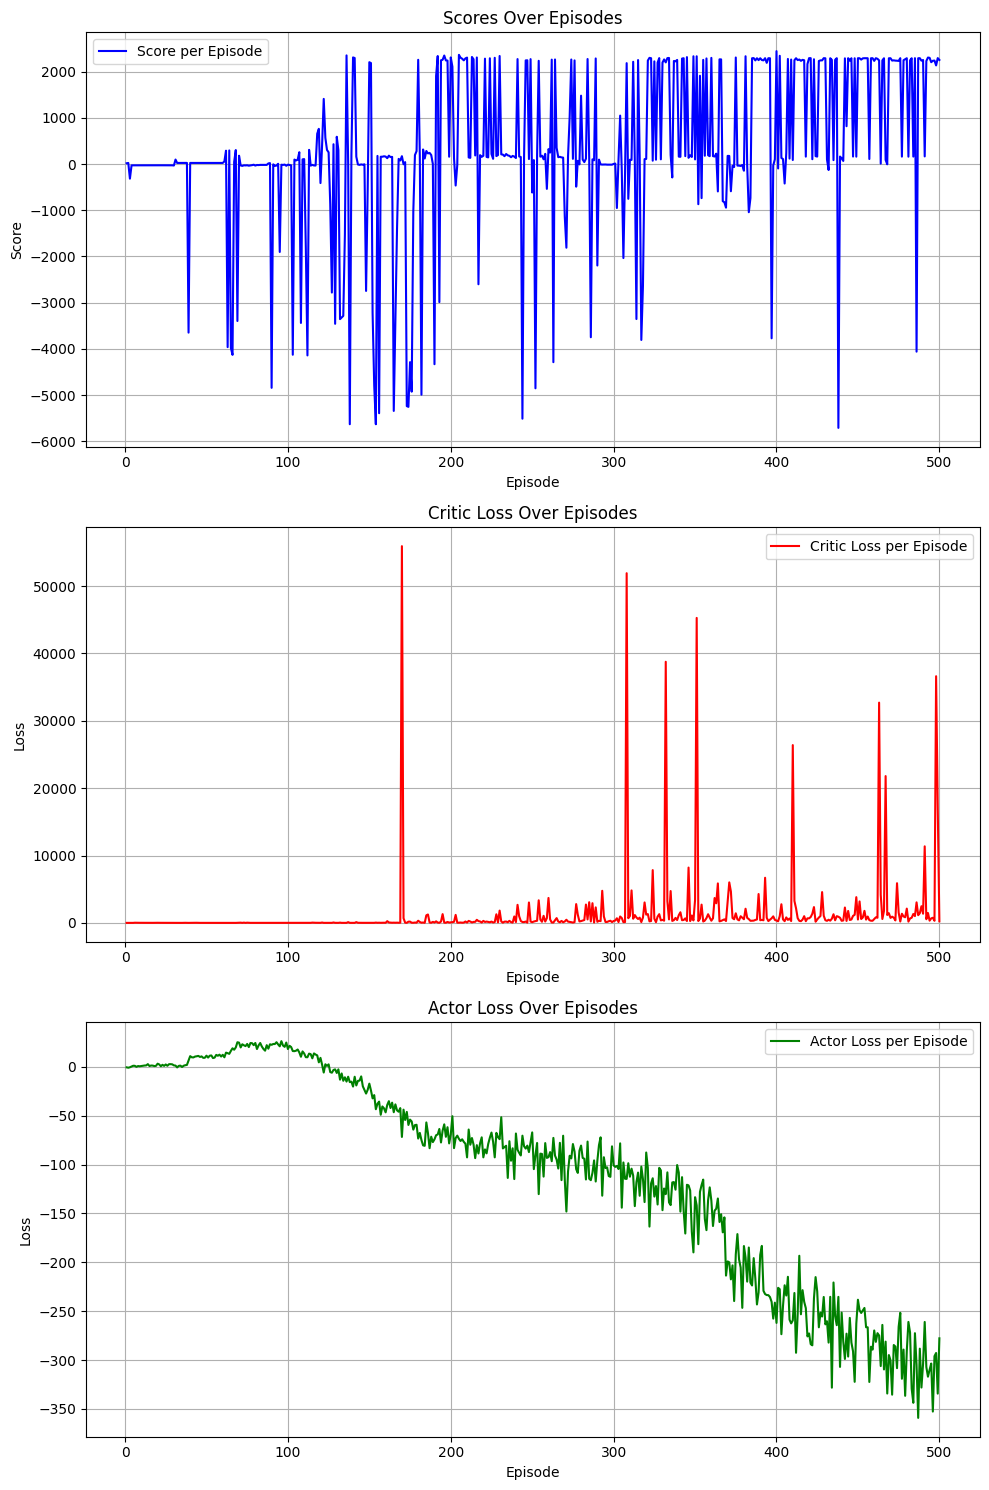

In [8]:
episodes = list(range(1, len(score_history) + 1))
plot_training_results(episodes, score_history, critic_losses, actor_losses, figure_file)

In [11]:
def load_and_simulate(env, agent, n_episodes=5, max_steps=500):
    rewards = []
    steps_per_episode = []

    for episode in range(n_episodes):
        state, info = env.reset()
        done = False
        total_reward = 0
        steps = 0

        while not done:
            env.render()  # Optional: Comment this out if you don't need to visually inspect the simulation
            action = agent.choose_action(state)
            state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
            steps += 1

            if steps >= max_steps:
                break

        print(f"Episode {episode + 1}: Total reward = {total_reward}, Steps = {steps}")
        rewards.append(total_reward)
        steps_per_episode.append(steps)

    env.close()  # Close the environment when done
    return rewards, steps_per_episode

In [16]:
def main():
    env = EscapeRoomEnv(max_steps_per_episode=500)
    agent = Agent(
        alpha=0.0001,
        beta=0.001,
        input_dims=env.observation_space.shape,
        tau=0.001,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
        batch_size=64,
    )

    # Assume agent.load_models is properly implemented
    agent.load_models()

    rewards, steps_per_episode = load_and_simulate(
        env, agent, n_episodes=5, max_steps=1000
    )


if __name__ == "__main__":
    main()

Episode 1: Total reward = -2678.1636318124692, Steps = 500
Goal 'G' reached in 54 steps with cumulative reward 1003.7333759922635 for this episode.
Episode 2: Total reward = 2285.828827929278, Steps = 54
Goal 'G' reached in 55 steps with cumulative reward 1003.2814923506611 for this episode.
Episode 3: Total reward = 2288.463187948922, Steps = 55
Goal 'G' reached in 55 steps with cumulative reward 1003.6104679705552 for this episode.
Episode 4: Total reward = 2288.3278286042932, Steps = 55
Goal 'G' reached in 55 steps with cumulative reward 1003.3460817636436 for this episode.
Episode 5: Total reward = 2288.235661781395, Steps = 55
